In [136]:
import numpy as np
import matplotlib.pyplot as plt

-0.07990764507940827


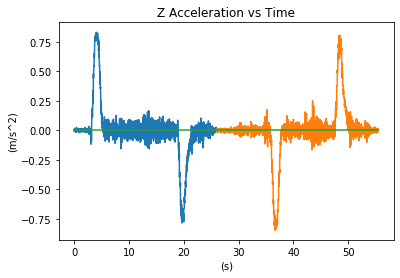

<Figure size 432x288 with 0 Axes>

In [159]:
ElevatorData = np.genfromtxt('Raw Data.csv', delimiter='\t', skip_header=1)

time = []
x_acc = []
y_acc = []
z_acc = []
total_acc = []

zeros = [0, 0, 0, 0, 0]
points = [0, 10, 20, 30, 55.5]

for i in range(len(ElevatorData)):         # Reading data into individual arrays
    time.append(ElevatorData[i][0])
    x_acc.append(ElevatorData[i][1])
    y_acc.append(ElevatorData[i][2])
    z_acc.append(ElevatorData[i][3])
    total_acc.append(ElevatorData[i][4])
    
ascent_time = []
descent_time = []
ascent_z_acc = []
descent_z_acc = []

shift_factor = sum(z_acc)/len(z_acc)   # We will shift the graph upward by this amount to get the graph centered at zero
print(shift_factor)

dt = 55.5/5542              # Number of seconds over the length of the array

divider = (ElevatorData[2600][0])  # About the halfway point of the data set, used to seperate ascent and descent
    
for i in range(len(ElevatorData)):
    if (ElevatorData[i][0] < divider):
        ascent_time.append(ElevatorData[i][0])
        ascent_z_acc.append(ElevatorData[i][3]-shift_factor)
    else:
        descent_time.append(ElevatorData[i][0])
        descent_z_acc.append(ElevatorData[i][3]-shift_factor)
          
plt.plot(ascent_time, ascent_z_acc)
plt.plot(descent_time, descent_z_acc)
plt.plot(points, zeros)
plt.title('Z Acceleration vs Time')
plt.xlabel('(s)')
plt.ylabel('(m/s^2)')
plt.show()
plt.clf()

# Ascent is in blue, descent is in orange

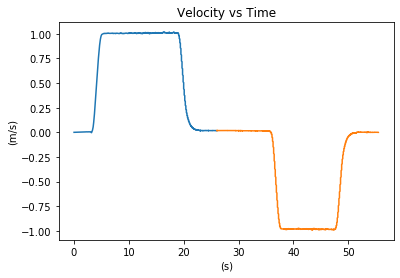

In [160]:
# CALCULATE V vs t (numerically integrate A vs t)

term_ascent = []                    # Each individual term; each tiny little 'rectangle' of width dt
term_descent = []
ascent_time_velocity = []
descent_time_velocity = []
ascent_velocity = []
descent_velocity = []

ascent_velocity.clear()
descent_velocity.clear()

for k in range(len(ascent_z_acc)-1):                                   # Ascent velocity
    term_ascent.append(((ascent_z_acc[k]+ascent_z_acc[k+1])/2)*dt)
    ascent_velocity.append(sum(term_ascent))
    ascent_time_velocity.append(ascent_time[k])
                
for k in range(len(descent_z_acc)-1):                                  # Descent velocity 
    term_descent.append(((descent_z_acc[k]+descent_z_acc[k+1])/2)*dt)
    descent_velocity.append(sum(term_descent)+sum(term_ascent))
    descent_time_velocity.append(descent_time[k])
        
plt.title('Velocity vs Time')
plt.xlabel('(s)')
plt.ylabel('(m/s)')
plt.plot(ascent_time_velocity, ascent_velocity)
plt.plot(descent_time_velocity, descent_velocity)
plt.show()

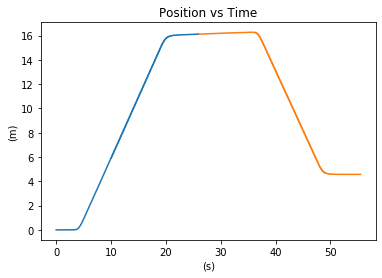

In [161]:
# CALCULATING P vs t (NUMERICALLY INTEGRATE V vs t)

pos_term_ascent = []                  
pos_term_descent = []
ascent_time_pos = []
descent_time_pos = []
ascent_pos = []
descent_pos = []

ascent_pos.clear()
descent_pos.clear()

for k in range(len(ascent_velocity)-1):                                  
    pos_term_ascent.append(((ascent_velocity[k]+ascent_velocity[k+1])/2)*dt)
    ascent_pos.append(sum(pos_term_ascent))
    ascent_time_pos.append(ascent_time_velocity[k])
                
for k in range(len(descent_velocity)-1):                                
    pos_term_descent.append(((descent_velocity[k]+descent_velocity[k+1])/2)*dt)
    descent_pos.append(sum(pos_term_descent)+sum(pos_term_ascent))
    descent_time_pos.append(descent_time_velocity[k])
        
plt.title('Position vs Time')
plt.xlabel('(s)')
plt.ylabel('(m)')
plt.plot(ascent_time_pos, ascent_pos)
plt.plot(descent_time_pos, descent_pos)
plt.show()

In [ ]:
# COMMENTS:
# The floor that I went up to was the fourth floor of ABB, then back to the second floor (I started at the bottom)
# Distance traveled on ascent: 16m
# Distance traveled on descent: about 12m
# Total displacement: about 4m